In [2]:
import pandas as pd
import numpy as np

raw = pd.read_csv("C:/users/runni/Documents/MASTERS/Data Mining/wildlife-strikes/database.csv")
#read in file
df = raw
df.columns = [c.replace(' ', '_') for c in raw.columns]

df.head()

C:\Users\runni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record_ID,Incident_Year,Incident_Month,Incident_Day,Operator_ID,Operator,Aircraft,Aircraft_Type,Aircraft_Make,Aircraft_Model,...,Fuselage_Strike,Fuselage_Damage,Landing_Gear_Strike,Landing_Gear_Damage,Tail_Strike,Tail_Damage,Lights_Strike,Lights_Damage,Other_Strike,Other_Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

C:\Users\runni\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Record_ID,Incident_Year,Incident_Month,Incident_Day,Aircraft_Mass,Engine_Make,Engines,Engine2_Position,Engine4_Position,Height,...,Fuselage_Strike,Fuselage_Damage,Landing_Gear_Strike,Landing_Gear_Damage,Tail_Strike,Tail_Damage,Lights_Strike,Lights_Damage,Other_Strike,Other_Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print (df.dtypes)
print (df.info())

Record_ID                 int64
Incident_Year             int64
Incident_Month            int64
Incident_Day              int64
Operator_ID              object
Operator                 object
Aircraft                 object
Aircraft_Type            object
Aircraft_Make            object
Aircraft_Model           object
Aircraft_Mass           float64
Engine_Make             float64
Engine_Model             object
Engines                 float64
Engine_Type              object
Engine1_Position         object
Engine2_Position        float64
Engine3_Position         object
Engine4_Position        float64
Airport_ID               object
Airport                  object
State                    object
FAA_Region               object
Warning_Issued           object
Flight_Phase             object
Visibility               object
Precipitation            object
Height                  float64
Speed                   float64
Distance                float64
                         ...   
Aircraft

In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

Incident_Year
1990     2099
1991     2672
1992     2816
1993     2849
1994     2938
1995     2989
1996     3215
1997     3651
1998     4131
1999     5385
2000     6351
2001     6216
2002     6659
2003     6485
2004     7122
2005     7591
2006     7750
2007     7993
2008     7993
2009     9848
2010     9934
2011    10363
2012    11264
2013    11666
2014    13976
2015    10148
Name: Aircraft_Damage, dtype: int64


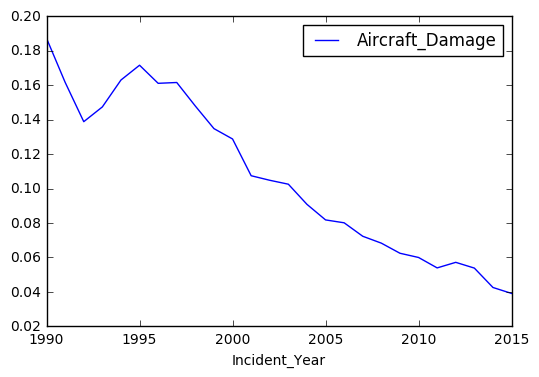

In [6]:
df_grouped = df.groupby(by='Incident_Year')
df_total = df_grouped.Aircraft_Damage.count()
print(df_total)
df_rate = pd.DataFrame(df_grouped.Aircraft_Damage.sum()/df_grouped.Aircraft_Damage.count())
df_rate.plot(kind='line')

# Damage Rate Over 

<function matplotlib.pyplot.show>

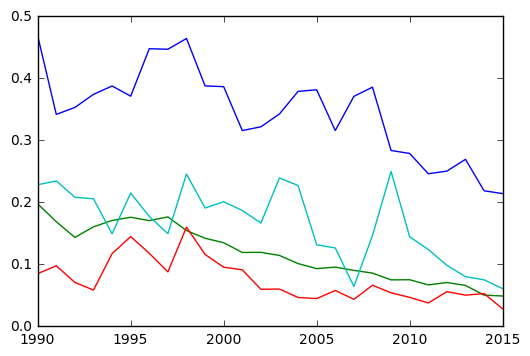

In [7]:
#Damage rate over time
df_group_year = df.groupby(by=['Incident_Year','Engines'], as_index=False)['Aircraft_Damage'].mean()

a1 = df_group_year.where(df_group_year['Engines']==1.0)
a2 = df_group_year.where(df_group_year['Engines']==2.0)
a3 = df_group_year.where(df_group_year['Engines']==3.0)
a4 = df_group_year.where(df_group_year['Engines']==4.0)
a1 = a1.dropna()
a2 = a2.dropna()
a3 = a3.dropna()
a4 = a4.dropna()

plt.plot(a1['Incident_Year'],a1['Aircraft_Damage'])
plt.plot(a2['Incident_Year'],a2['Aircraft_Damage'])
plt.plot(a3['Incident_Year'],a3['Aircraft_Damage'])
plt.plot(a4['Incident_Year'],a4['Aircraft_Damage'])
plt.show

#incident_rate = df_group_year.Aircraft_Damage.sum() / df_group_year.Aircraft_Damage.count()

#crossed = pd.crosstab([df['Incident_Year'],df['Engines']],df.Aircraft_Damage.astype(bool))
#incident_rate = crossed.div(crossed.sum(1).astype(float) axis=0) # normalize the value

#print(incident_rate)

#plt.figure(); incident_rate.plot(x='Incident_Year',y='Aircraft_Damage');
#print(incident_rate)
#ax = incident_rate.plot(kind='line')


In [8]:
df_grouped = df.groupby(by=['Engines'])
print (df_grouped.Aircraft_Damage.count())
print (df_grouped.Aircraft_Damage.sum())
print (df_grouped.Aircraft_Damage.sum() / df_grouped.Aircraft_Damage.count())

Engines
1.0      7471
2.0    108155
3.0      8619
4.0      3097
Name: Aircraft_Damage, dtype: int64
Engines
1.0     2438
2.0    10702
3.0      655
4.0      497
Name: Aircraft_Damage, dtype: int64
Engines
1.0    0.326328
2.0    0.098951
3.0    0.075995
4.0    0.160478
Name: Aircraft_Damage, dtype: float64


## Put in a Scatter Plot 

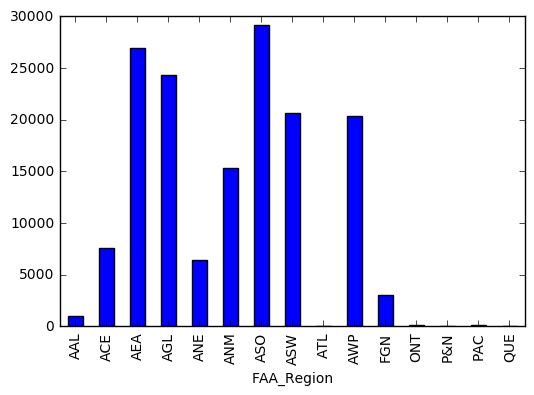

In [9]:
df_region = df.groupby(by='FAA_Region')
df_region_count = df_region.Aircraft_Damage.count()

ax = df_region_count.plot(kind='bar')

Aircraft_Damage     False     True 
Flight_Phase                       
APPROACH         0.903925  0.096075
ARRIVAL          0.948052  0.051948
CLIMB            0.837650  0.162350
DEPARTURE        0.964770  0.035230
DESCENT          0.798677  0.201323
EN ROUTE         0.613583  0.386417
LANDING          0.952077  0.047923
LANDING ROLL     0.926693  0.073307
LOCAL            0.943038  0.056962
PARKED           0.926316  0.073684
TAKEOFF RUN      0.908122  0.091878
TAXI             0.921914  0.078086


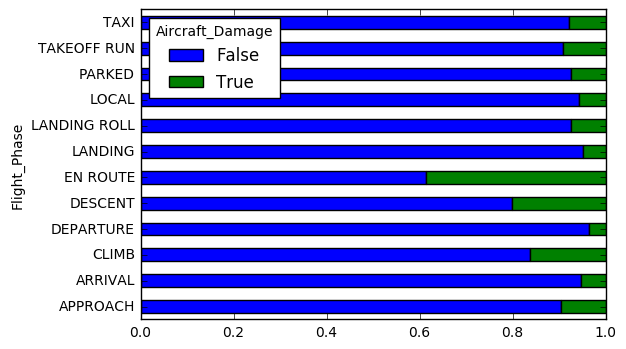

In [21]:
df_phase = pd.crosstab(df['Flight_Phase'],df.Aircraft_Damage.astype(bool))
df_phase_rate = df_phase.div(df_phase.sum(1).astype(float),
                            axis=0)
print(df_phase_rate)
ax = df_phase_rate.plot(kind='barh',stacked=True)

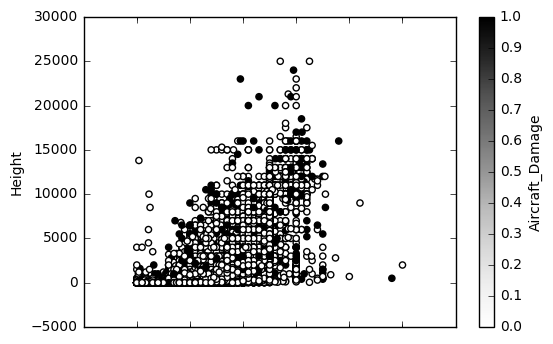

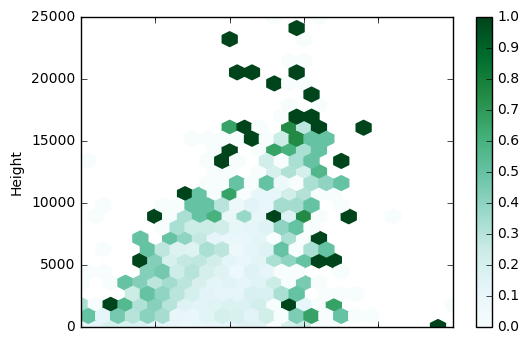

In [40]:
df_speed_height = df[['Speed','Height','Aircraft_Damage']]
df_speed_height = df_speed_height.dropna()
df_speed_height = df_speed_height[df_speed_height['Speed'] < 2000]
#used to drop a bad data point.  The speed indicated in the data was faster than the plan was capable of flying.
#plt.plot(df_speed_height['Speed'],df_speed_height['Height'],"o")
ax = df_speed_height.plot(kind='scatter', x='Speed',y='Height',c='Aircraft_Damage')
df_speed_height.plot(kind='hexbin', x='Speed',y='Height',C='Aircraft_Damage',reduce_C_function=np.mean,gridsize=25)

In [47]:
df_speed_height_region = df[['Speed','Height','FAA_Region','Aircraft_Damage']]
df_speed_height_region = df_speed_height_region.dropna()
FAA_Region = pd.unique(df_speed_height_region['FAA_Region'])
print(FAA_Region)
#for i in df_speed_height_region:
#    print(df_speed_height_region['FAA_Region'])
#print(df_speed_height_region)

['ASO' 'ASW' 'AWP' 'AEA' 'AGL' 'ACE' 'FGN' 'AAL' 'ANM' 'ANE' 'P&N' 'ONT'
 'QUE' 'PAC' 'ATL']
